In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
# Importing the dataset
data = pd.read_csv('datasets/meta_nn_final.csv')

In [3]:
data.head()

,timestamp,row,col,aws_value,B09B,B16B,B14B,I4B,I2B,B10B,...,TCLW,U250,TCWV,TCW,SLHF,lgbm_aws_value,rf_aws_value,xgb_aws_value,nn_aws_value,ensemble_aws_value
0,2019-04-02 11:00:00,72,114,0.2,0.842555,0.978763,0.957752,0.794181,0.967767,0.880730,...,0.078656,0.895124,0.125008,0.110954,0.621544,0.895907,0.919235,0.323373,1.988712,1.327721
1,2019-10-07 15:00:00,16,96,0.2,0.766795,0.790690,0.721857,0.508284,0.760105,0.766806,...,0.138902,0.387109,0.058854,0.051365,0.898917,3.065363,2.955252,2.082739,0.443333,2.477028
2,2019-10-07 15:00:00,18,102,0.1,0.767995,0.912181,0.883520,0.724080,0.898074,0.815380,...,0.186877,0.417636,0.174806,0.162472,0.904116,1.094111,1.014012,0.911951,0.576611,1.192373
3,2019-10-07 15:00:00,20,91,1.8,0.824530,0.888923,0.834085,0.618948,0.863910,0.856292,...,0.127769,0.441973,0.048688,0.041305,0.903416,1.665673,2.108587,1.244393,0.552607,1.847955
4,2019-10-07 15:00:00,38,96,8.8,0.657942,0.751723,0.697645,0.496764,0.732697,0.673686,...,0.136880,0.670502,0.152262,0.138924,0.897817,0.901274,1.491033,0.524630,1.072264,1.460063


In [5]:
# Chuyển đổi cột 'timestamp' thành kiểu datetime
data['timestamp'] = pd.to_datetime(data['timestamp'])

# Trích xuất ngày từ cột 'timestamp'
data['date'] = data['timestamp'].dt.date

# Nhóm các hàng theo ngày và đếm số lượng hàng trong mỗi nhóm
row_counts = data.groupby('date').size()

# Tìm ngày có nhiều hàng nhất
max_rows_date = row_counts.idxmax()
max_rows_count = row_counts.max()

print(f"Ngày có nhiều hàng nhất: {max_rows_date} với {max_rows_count} hàng")

Ngày có nhiều hàng nhất: 2020-10-30 với 3433 hàng


In [6]:
# Trích xuất tháng từ cột 'timestamp'
data['month'] = data['timestamp'].dt.to_period('M')

# Nhóm các hàng theo tháng và đếm số lượng hàng trong mỗi nhóm
monthly_counts = data.groupby('month').size()

# Tìm tháng có nhiều hàng nhất
max_month = monthly_counts.idxmax()
max_month_count = monthly_counts.max()

print(f"Tháng có nhiều hàng nhất: {max_month} với {max_month_count} hàng")

Tháng có nhiều hàng nhất: 2020-10 với 29644 hàng


In [7]:
# Trích xuất ngày và giờ từ cột 'timestamp'
data['date_hour'] = data['timestamp'].dt.floor('H')

# Nhóm các hàng theo ngày và giờ, sau đó đếm số lượng hàng trong mỗi nhóm
hourly_counts = data.groupby('date_hour').size()

# Tìm ngày và giờ có nhiều hàng nhất
max_hour = hourly_counts.idxmax()
max_hour_count = hourly_counts.max()

print(f"Ngày và giờ có nhiều hàng nhất: {max_hour} với {max_hour_count} hàng")

Ngày và giờ có nhiều hàng nhất: 2020-10-15 12:00:00 với 189 hàng


In [27]:
data_1_month = data[(data['timestamp'] >= '2020-10-01') & (data['timestamp'] < '2020-10-31')]
data_24h = data[(data['timestamp'] >= '2020-10-30 00:00:00') & (data['timestamp'] < '2020-10-31 00:00:00')]
data_1h = data[(data['timestamp'] >= '2020-10-15 12:00:00') & (data['timestamp'] < '2020-10-15 13:00:00')]

In [28]:
data_1_month

,timestamp,row,col,aws_value,B09B,B16B,B14B,I4B,I2B,B10B,...,TCW,SLHF,lgbm_aws_value,rf_aws_value,xgb_aws_value,nn_aws_value,ensemble_aws_value,date,month,date_hour
5211,2020-10-01 00:00:00,0,114,1.5,0.357106,0.450404,0.400665,0.389441,0.454971,0.356641,...,0.688895,0.772327,1.334487,1.802249,1.713961,9.908966,4.980626,2020-10-01,2020-10,2020-10-01 00:00:00
5212,2020-10-01 00:00:00,3,115,0.4,0.287592,0.396415,0.355222,0.352628,0.410190,0.287377,...,0.688895,0.772327,1.291325,1.640042,1.177714,8.760786,4.371509,2020-10-01,2020-10,2020-10-01 00:00:00
5213,2020-10-01 00:00:00,5,114,1.0,0.269026,0.388148,0.346900,0.358209,0.403406,0.273404,...,0.688895,0.772327,1.204006,1.697229,1.244826,8.338904,4.248064,2020-10-01,2020-10,2020-10-01 00:00:00
5214,2020-10-01 00:00:00,6,112,0.4,0.258012,0.381819,0.339546,0.355346,0.396813,0.258096,...,0.619151,0.783625,3.641687,3.884956,4.232675,8.976931,5.493775,2020-10-01,2020-10,2020-10-01 00:00:00
5215,2020-10-01 00:00:00,7,115,1.2,0.299002,0.402765,0.362391,0.380141,0.416814,0.291764,...,0.619151,0.783625,4.099209,4.521104,4.525511,8.929832,5.937613,2020-10-01,2020-10,2020-10-01 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33463,2020-10-30 23:00:00,83,135,5.2,0.824282,0.966482,0.928382,0.719035,0.944044,0.875340,...,0.424122,0.105957,2.384082,3.706252,3.042175,2.531670,3.762732,2020-10-30,2020-10,2020-10-30 23:00:00
33464,2020-10-30 23:00:00,84,124,4.2,0.821659,0.966474,0.926640,0.724244,0.947656,0.868120,...,0.277665,0.826927,1.314426,2.281251,1.709792,0.290121,2.016357,2020-10-30,2020-10,2020-10-30 23:00:00
33465,2020-10-30 23:00:00,84,137,0.6,0.821659,0.969559,0.934471,0.734150,0.950573,0.871748,...,0.424122,0.105957,2.328868,3.279292,3.042175,2.189974,3.453797,2020-10-30,2020-10,2020-10-30 23:00:00
33466,2020-10-30 23:00:00,86,131,1.2,0.824282,0.970584,0.932745,0.726446,0.949126,0.877137,...,0.357694,0.720746,1.304336,1.662387,1.377044,0.641587,1.707213,2020-10-30,2020-10,2020-10-30 23:00:00


In [29]:
data_24h

,timestamp,row,col,aws_value,B09B,B16B,B14B,I4B,I2B,B10B,...,TCW,SLHF,lgbm_aws_value,rf_aws_value,xgb_aws_value,nn_aws_value,ensemble_aws_value,date,month,date_hour
30035,2020-10-30 00:00:00,0,104,0.6,0.761805,0.841508,0.803193,0.675099,0.827257,0.796132,...,0.369256,0.813692,0.791074,0.435191,0.820667,0.628310,0.829461,2020-10-30,2020-10,2020-10-30 00:00:00
30036,2020-10-30 00:00:00,0,106,0.2,0.758919,0.834890,0.796755,0.668987,0.820939,0.792209,...,0.369256,0.813692,0.774858,0.390674,0.838085,0.655007,0.810419,2020-10-30,2020-10,2020-10-30 00:00:00
30037,2020-10-30 00:00:00,0,114,0.1,0.738459,0.810368,0.774762,0.660320,0.798478,0.776449,...,0.427648,0.803193,0.678354,0.347096,0.708766,0.284764,0.679208,2020-10-30,2020-10,2020-10-30 00:00:00
30038,2020-10-30 00:00:00,0,116,0.2,0.741730,0.810705,0.774338,0.659262,0.796328,0.776662,...,0.477216,0.741205,0.526653,0.324060,0.602074,-0.120502,0.545520,2020-10-30,2020-10,2020-10-30 00:00:00
30039,2020-10-30 00:00:00,0,118,0.2,0.744731,0.812975,0.778647,0.661926,0.799730,0.778878,...,0.477216,0.741205,0.526653,0.323891,0.600683,-0.122508,0.544538,2020-10-30,2020-10,2020-10-30 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33463,2020-10-30 23:00:00,83,135,5.2,0.824282,0.966482,0.928382,0.719035,0.944044,0.875340,...,0.424122,0.105957,2.384082,3.706252,3.042175,2.531670,3.762732,2020-10-30,2020-10,2020-10-30 23:00:00
33464,2020-10-30 23:00:00,84,124,4.2,0.821659,0.966474,0.926640,0.724244,0.947656,0.868120,...,0.277665,0.826927,1.314426,2.281251,1.709792,0.290121,2.016357,2020-10-30,2020-10,2020-10-30 23:00:00
33465,2020-10-30 23:00:00,84,137,0.6,0.821659,0.969559,0.934471,0.734150,0.950573,0.871748,...,0.424122,0.105957,2.328868,3.279292,3.042175,2.189974,3.453797,2020-10-30,2020-10,2020-10-30 23:00:00
33466,2020-10-30 23:00:00,86,131,1.2,0.824282,0.970584,0.932745,0.726446,0.949126,0.877137,...,0.357694,0.720746,1.304336,1.662387,1.377044,0.641587,1.707213,2020-10-30,2020-10,2020-10-30 23:00:00


In [30]:
data_1h

,timestamp,row,col,aws_value,B09B,B16B,B14B,I4B,I2B,B10B,...,TCW,SLHF,lgbm_aws_value,rf_aws_value,xgb_aws_value,nn_aws_value,ensemble_aws_value,date,month,date_hour
13755,2020-10-15 12:00:00,0,104,2.6,0.575861,0.606501,0.531592,0.315896,0.582094,0.568886,...,0.661653,0.793194,1.560851,1.944149,2.093152,1.364672,2.263339,2020-10-15,2020-10,2020-10-15 12:00:00
13756,2020-10-15 12:00:00,0,106,1.6,0.547164,0.576158,0.503024,0.280627,0.556606,0.542310,...,0.661653,0.793194,1.558535,2.335695,2.133193,1.491800,2.520270,2020-10-15,2020-10,2020-10-15 12:00:00
13757,2020-10-15 12:00:00,0,114,1.4,0.378840,0.433649,0.368854,0.179776,0.431038,0.363527,...,0.847955,0.726306,2.948748,2.844629,3.508174,3.503939,3.617571,2020-10-15,2020-10,2020-10-15 12:00:00
13758,2020-10-15 12:00:00,0,116,6.8,0.273969,0.358865,0.297672,0.098146,0.368156,0.269043,...,0.947710,0.649820,6.241111,6.482581,7.066351,5.529922,7.147069,2020-10-15,2020-10,2020-10-15 12:00:00
13759,2020-10-15 12:00:00,0,118,8.8,0.285464,0.363948,0.302482,0.095345,0.366186,0.277614,...,0.947710,0.649820,6.493691,6.966591,7.097794,5.482260,7.376734,2020-10-15,2020-10,2020-10-15 12:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13939,2020-10-15 12:00:00,80,125,0.4,0.397257,0.475022,0.447085,0.426931,0.486195,0.422440,...,0.764948,0.713408,1.503403,0.852612,1.883847,1.561172,1.536184,2020-10-15,2020-10,2020-10-15 12:00:00
13940,2020-10-15 12:00:00,82,124,2.4,0.428992,0.522741,0.506018,0.504118,0.535982,0.462480,...,0.600058,0.830187,1.882481,2.937316,1.775676,1.249185,2.622167,2020-10-15,2020-10,2020-10-15 12:00:00
13941,2020-10-15 12:00:00,82,127,0.6,0.403501,0.483168,0.460347,0.450873,0.497406,0.434363,...,0.600058,0.830187,2.198566,2.824570,2.202342,1.462691,2.754048,2020-10-15,2020-10,2020-10-15 12:00:00
13942,2020-10-15 12:00:00,82,129,0.4,0.413970,0.493173,0.471476,0.459070,0.506900,0.436856,...,0.684077,0.736104,0.860447,0.562261,0.514199,0.922205,0.895542,2020-10-15,2020-10,2020-10-15 12:00:00


C:\Users\Pisco\AppData\Local\Temp\ipykernel_14084\4051222788.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data['aws_value'], label='Ground Truth', shade=True)
c:\Users\Pisco\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Pisco\AppData\Local\Temp\ipykernel_14084\4051222788.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data['ensemble_aws_value'], label='Predicted', shade=True)
c:\Users\Pisco\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a futu

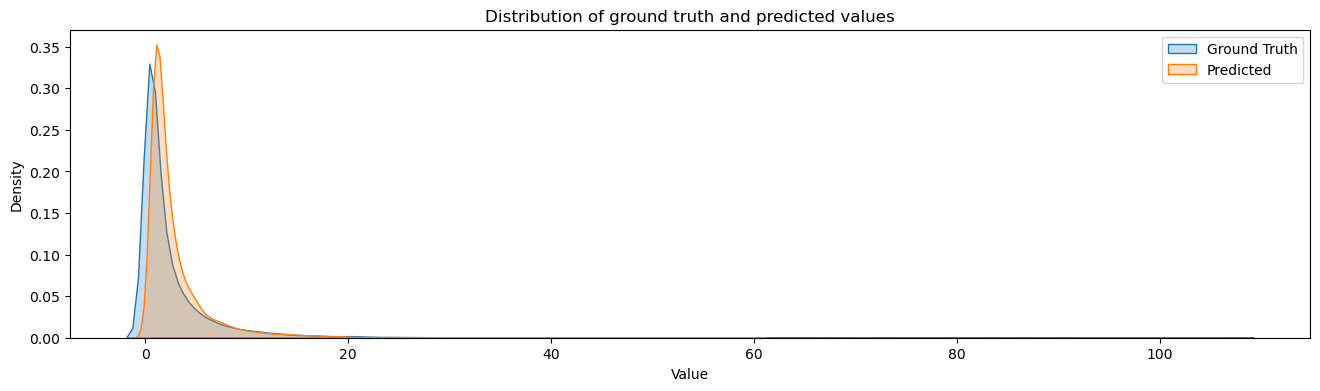

Trung bình của aws_value: 2.687292593122508
Trung bình của ensemble_aws_value: 3.0286533258809354


In [ ]:
# Vẽ phân phối của 2 cột aws_value và ensemble_aws_value
plt.figure(figsize=(16, 4))

# Vẽ phân phối của cột aws_value
sns.kdeplot(data['aws_value'], label='Ground Truth', shade=True)

# Vẽ phân phối của cột ensemble_aws_value
sns.kdeplot(data['ensemble_aws_value'], label='Predicted', shade=True)

# Add title and labels
plt.title('Distribution of ground truth and predicted values')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()

# Hiển thị biểu đồ
plt.show()

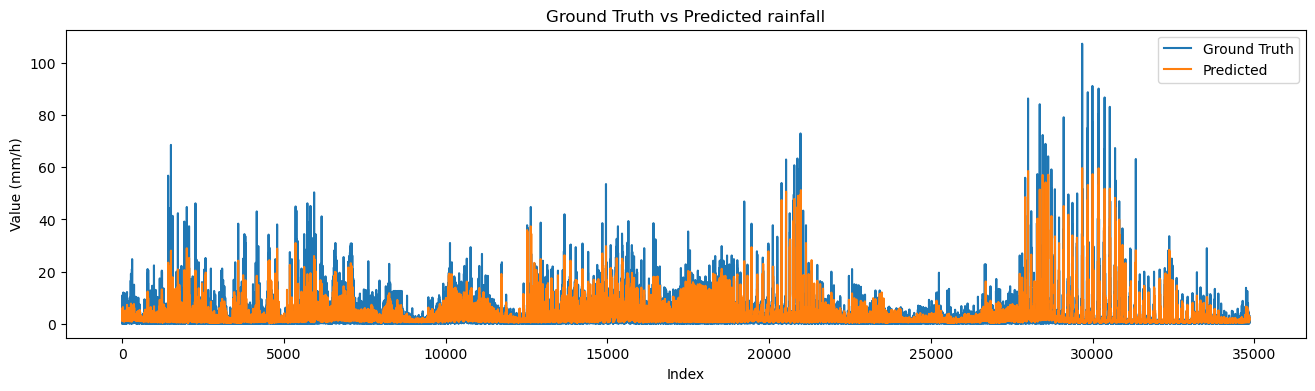

In [59]:
# Plot the results of aws_value and ensemble_aws_value
plt.figure(figsize=(16, 4))

# Plot aws_value
plt.plot(data.index, data['aws_value'], label='Ground Truth')

# Plot ensemble_aws_value
plt.plot(data.index, data['ensemble_aws_value'], label='Predicted')

# Add title and labels
plt.title('Ground Truth vs Predicted rainfall')
plt.xlabel('Index')
plt.ylabel('Value (mm/h)')
plt.legend()

# Show the plot
plt.show()



# Trung bình 4 tháng


In [32]:
import matplotlib.patches as patches

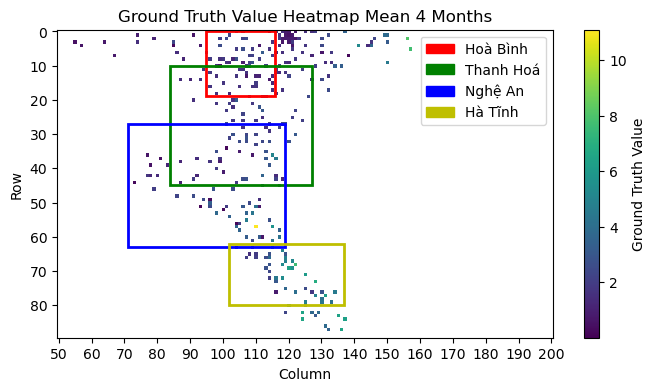

In [66]:
# Initialize an empty image and a count matrix
image = np.zeros((90, 250))
count = np.zeros((90, 250))

# Fill the image with data values and count occurrences
for index, row in data.iterrows():
    r = row['row']
    c = row['col']
    value = row['aws_value']
    image[r, c] += value
    count[r, c] += 1

# Calculate the average values
image = np.divide(image, count, where=count != 0)

# Crop the image to only include columns 50 to 200
cropped_image = image[:, 50:201]

# Create a colormap with white for zero values
cmap = plt.cm.viridis
cmap.set_under('white')

# Plot the cropped image
plt.figure(figsize=(8, 4))
plt.imshow(cropped_image, cmap=cmap, aspect='auto', vmin=0.01)
plt.colorbar(label='Ground Truth Value')
plt.xlabel('Column')
plt.ylabel('Row')
plt.title('Ground Truth Value Heatmap Mean 4 Months')

# Set x-axis ticks and labels starting from 50
plt.xticks(ticks=np.arange(0, cropped_image.shape[1], 10), labels=np.arange(50, 201, 10))

# Define bounding boxes
boxes = [
    {"xy": (95 - 50, 0), "width": 116 - 95, "height": 19 - 0, "edgecolor": 'r', "label": 'Hoà Bình'},
    {"xy": (84 - 50, 10), "width": 127 - 84, "height": 45 - 10, "edgecolor": 'g', "label": 'Thanh Hoá'},
    {"xy": (71 - 50, 27), "width": 119 - 71, "height": 63 - 27, "edgecolor": 'b', "label": 'Nghệ An'},
    {"xy": (102 - 50, 62), "width": 137 - 102, "height": 80 - 62, "edgecolor": 'y', "label": 'Hà Tĩnh'}
]

# Add bounding boxes to the plot
for box in boxes:
    rect = patches.Rectangle(**box, linewidth=2, facecolor='none')
    plt.gca().add_patch(rect)

# Add legend
handles = [patches.Patch(color=box["edgecolor"], label=box["label"]) for box in boxes]
plt.legend(handles=handles, loc='upper right')

plt.show()

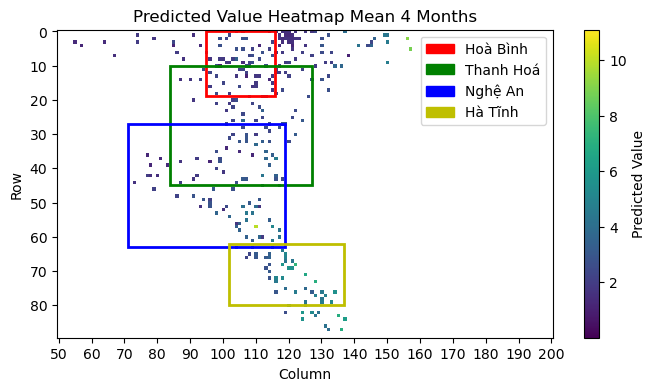

In [67]:
# Initialize an empty image and a count matrix
image_pred = np.zeros((90, 250))
count_pred = np.zeros((90, 250))

# Fill the image with data values and count occurrences
for index, row in data.iterrows():
    r = row['row']
    c = row['col']
    value = row['ensemble_aws_value']
    image_pred[r, c] += value
    count_pred[r, c] += 1

# Calculate the average values
image_pred = np.divide(image_pred, count_pred, where=count_pred != 0)

# Crop the image to only include columns 50 to 200
cropped_image_pred = image_pred[:, 50:201]

# Determine the min and max values for the color bar
vmax = np.max(cropped_image)

# Create a colormap with white for zero values
cmap = plt.cm.viridis
cmap.set_under('white')

# Plot the cropped image
plt.figure(figsize=(8, 4))
plt.imshow(cropped_image_pred, cmap=cmap, aspect='auto', vmin=0.01, vmax=vmax)
plt.colorbar(label='Predicted Value')
plt.xlabel('Column')
plt.ylabel('Row')
plt.title('Predicted Value Heatmap Mean 4 Months')

# Set x-axis ticks and labels starting from 50
plt.xticks(ticks=np.arange(0, cropped_image.shape[1], 10), labels=np.arange(50, 201, 10))

# Define bounding boxes
boxes = [
    {"xy": (95 - 50, 0), "width": 116 - 95, "height": 19 - 0, "edgecolor": 'r', "label": 'Hoà Bình'},
    {"xy": (84 - 50, 10), "width": 127 - 84, "height": 45 - 10, "edgecolor": 'g', "label": 'Thanh Hoá'},
    {"xy": (71 - 50, 27), "width": 119 - 71, "height": 63 - 27, "edgecolor": 'b', "label": 'Nghệ An'},
    {"xy": (102 - 50, 62), "width": 137 - 102, "height": 80 - 62, "edgecolor": 'y', "label": 'Hà Tĩnh'}
]

# Add bounding boxes to the plot
for box in boxes:
    rect = patches.Rectangle(**box, linewidth=2, facecolor='none')
    plt.gca().add_patch(rect)

# Add legend
handles = [patches.Patch(color=box["edgecolor"], label=box["label"]) for box in boxes]
plt.legend(handles=handles, loc='upper right')

plt.show()


In [36]:
# Define the regions with their respective pixel ranges
regions = {
    'Hoà Bình': {'row_range': (0, 19), 'col_range': (95, 116)},
    'Thanh Hoá': {'row_range': (10, 45), 'col_range': (84, 127)},
    'Nghệ An': {'row_range': (27, 63), 'col_range': (71, 119)},
    'Hà Tĩnh': {'row_range': (62, 80), 'col_range': (102, 137)}
}

# Initialize a dictionary to store the results
region_averages = {}

# Calculate the average values for each region
for region, ranges in regions.items():
    row_min, row_max = ranges['row_range']
    col_min, col_max = ranges['col_range']
    
    # Filter the data for the specified region
    region_data = data[(data['row'] >= row_min) & (data['row'] <= row_max) &
                       (data['col'] >= col_min) & (data['col'] <= col_max)]
    
    # Calculate the mean values
    aws_value_mean = region_data['aws_value'].mean()
    ensemble_aws_value_mean = region_data['ensemble_aws_value'].mean()
    
    # Store the results
    region_averages[region] = {
        'aws_value_mean': aws_value_mean,
        'ensemble_aws_value_mean': ensemble_aws_value_mean
    }

# Print the results
for region, averages in region_averages.items():
    print(f"{region}:")
    print(f"  Average aws_value: {averages['aws_value_mean']:.4f}")
    print(f"  Average ensemble_aws_value: {averages['ensemble_aws_value_mean']:.4f}")

Hoà Bình:
  Average aws_value: 1.8355
  Average ensemble_aws_value: 2.2027
Thanh Hoá:
  Average aws_value: 1.9910
  Average ensemble_aws_value: 2.3621
Nghệ An:
  Average aws_value: 2.6971
  Average ensemble_aws_value: 2.9756
Hà Tĩnh:
  Average aws_value: 3.8083
  Average ensemble_aws_value: 4.1255


# Trung bình 1 tháng


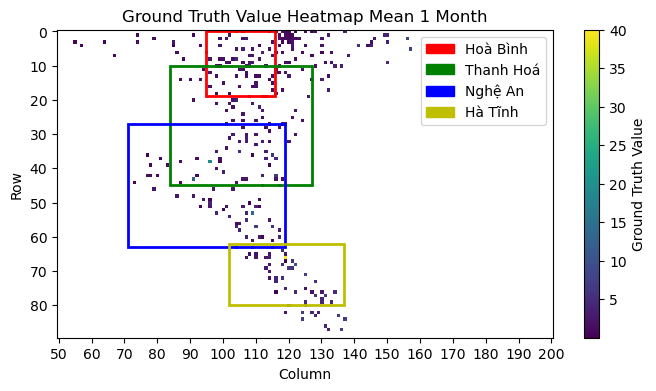

In [68]:
# Initialize an empty image and a count matrix
image = np.zeros((90, 250))
count = np.zeros((90, 250))

# Fill the image with data values and count occurrences
for index, row in data_1_month.iterrows():
    r = row['row']
    c = row['col']
    value = row['aws_value']
    image[r, c] += value
    count[r, c] += 1

# Calculate the average values
image = np.divide(image, count, where=count != 0)

# Crop the image to only include columns 50 to 200
cropped_image = image[:, 50:201]

# Create a colormap with white for zero values
cmap = plt.cm.viridis
cmap.set_under('white')

# Plot the cropped image
plt.figure(figsize=(8, 4))
plt.imshow(cropped_image, cmap=cmap, aspect='auto', vmin=0.01)
plt.colorbar(label='Ground Truth Value')
plt.xlabel('Column')
plt.ylabel('Row')
plt.title('Ground Truth Value Heatmap Mean 1 Month')

# Set x-axis ticks and labels starting from 50
plt.xticks(ticks=np.arange(0, cropped_image.shape[1], 10), labels=np.arange(50, 201, 10))

# Define bounding boxes
boxes = [
    {"xy": (95 - 50, 0), "width": 116 - 95, "height": 19 - 0, "edgecolor": 'r', "label": 'Hoà Bình'},
    {"xy": (84 - 50, 10), "width": 127 - 84, "height": 45 - 10, "edgecolor": 'g', "label": 'Thanh Hoá'},
    {"xy": (71 - 50, 27), "width": 119 - 71, "height": 63 - 27, "edgecolor": 'b', "label": 'Nghệ An'},
    {"xy": (102 - 50, 62), "width": 137 - 102, "height": 80 - 62, "edgecolor": 'y', "label": 'Hà Tĩnh'}
]

# Add bounding boxes to the plot
for box in boxes:
    rect = patches.Rectangle(**box, linewidth=2, facecolor='none')
    plt.gca().add_patch(rect)

# Add legend
handles = [patches.Patch(color=box["edgecolor"], label=box["label"]) for box in boxes]
plt.legend(handles=handles, loc='upper right')

plt.show()


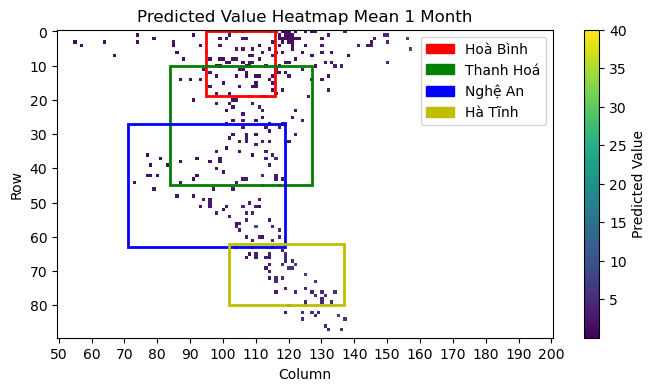

In [70]:
# Initialize an empty image and a count matrix
image_pred = np.zeros((90, 250))
count_pred = np.zeros((90, 250))

# Fill the image with data values and count occurrences
for index, row in data.iterrows():
    r = row['row']
    c = row['col']
    value = row['ensemble_aws_value']
    image_pred[r, c] += value
    count_pred[r, c] += 1

# Calculate the average values
image_pred = np.divide(image_pred, count_pred, where=count_pred != 0)

# Crop the image to only include columns 50 to 200
cropped_image_pred = image_pred[:, 50:201]

# Determine the min and max values for the color bar
vmax = np.max(cropped_image)

# Create a colormap with white for zero values
cmap = plt.cm.viridis
cmap.set_under('white')

# Plot the cropped image
plt.figure(figsize=(8, 4))
plt.imshow(cropped_image_pred, cmap=cmap, aspect='auto', vmin=0.01, vmax=vmax) 
plt.colorbar(label='Predicted Value')
plt.xlabel('Column')
plt.ylabel('Row')
plt.title('Predicted Value Heatmap Mean 1 Month')

# Set x-axis ticks and labels starting from 50
plt.xticks(ticks=np.arange(0, cropped_image.shape[1], 10), labels=np.arange(50, 201, 10))

# Define bounding boxes
boxes = [
    {"xy": (95 - 50, 0), "width": 116 - 95, "height": 19 - 0, "edgecolor": 'r', "label": 'Hoà Bình'},
    {"xy": (84 - 50, 10), "width": 127 - 84, "height": 45 - 10, "edgecolor": 'g', "label": 'Thanh Hoá'},
    {"xy": (71 - 50, 27), "width": 119 - 71, "height": 63 - 27, "edgecolor": 'b', "label": 'Nghệ An'},
    {"xy": (102 - 50, 62), "width": 137 - 102, "height": 80 - 62, "edgecolor": 'y', "label": 'Hà Tĩnh'}
]

# Add bounding boxes to the plot
for box in boxes:
    rect = patches.Rectangle(**box, linewidth=2, facecolor='none')
    plt.gca().add_patch(rect)

# Add legend
handles = [patches.Patch(color=box["edgecolor"], label=box["label"]) for box in boxes]
plt.legend(handles=handles, loc='upper right')

plt.show()

In [39]:
# Define the regions with their respective pixel ranges
regions = {
    'Hoà Bình': {'row_range': (0, 19), 'col_range': (95, 116)},
    'Thanh Hoá': {'row_range': (10, 45), 'col_range': (84, 127)},
    'Nghệ An': {'row_range': (27, 63), 'col_range': (71, 119)},
    'Hà Tĩnh': {'row_range': (62, 80), 'col_range': (102, 137)}
}

# Initialize a dictionary to store the results
region_averages = {}

# Calculate the average values for each region
for region, ranges in regions.items():
    row_min, row_max = ranges['row_range']
    col_min, col_max = ranges['col_range']
    
    # Filter the data for the specified region
    region_data = data_1_month[(data_1_month['row'] >= row_min) & (data_1_month['row'] <= row_max) &
                       (data_1_month['col'] >= col_min) & (data_1_month['col'] <= col_max)]
    
    # Calculate the mean values
    aws_value_mean = region_data['aws_value'].mean()
    ensemble_aws_value_mean = region_data['ensemble_aws_value'].mean()
    
    # Store the results
    region_averages[region] = {
        'aws_value_mean': aws_value_mean,
        'ensemble_aws_value_mean': ensemble_aws_value_mean
    }

# Print the results
for region, averages in region_averages.items():
    print(f"{region}:")
    print(f"  Average aws_value: {averages['aws_value_mean']:.4f}")
    print(f"  Average ensemble_aws_value: {averages['ensemble_aws_value_mean']:.4f}")

Hoà Bình:
  Average aws_value: 2.0084
  Average ensemble_aws_value: 2.3949
Thanh Hoá:
  Average aws_value: 2.1469
  Average ensemble_aws_value: 2.5455
Nghệ An:
  Average aws_value: 2.8524
  Average ensemble_aws_value: 3.1606
Hà Tĩnh:
  Average aws_value: 3.9965
  Average ensemble_aws_value: 4.3513


# Trung bình 24h


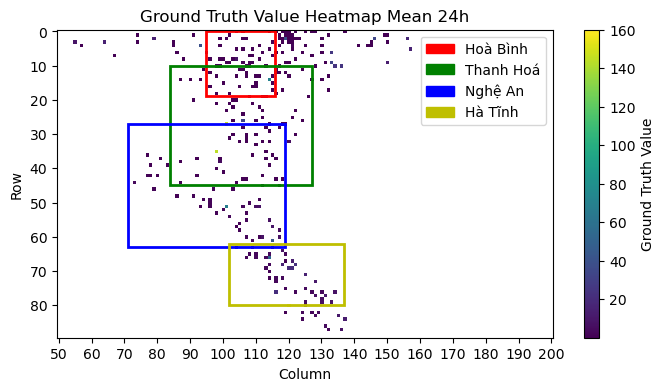

In [71]:
# Initialize an empty image and a count matrix
image = np.zeros((90, 250))
count = np.zeros((90, 250))

# Fill the image with data values and count occurrences
for index, row in data_24h.iterrows():
    r = row['row']
    c = row['col']
    value = row['aws_value']
    image[r, c] += value
    count[r, c] += 1

# Calculate the average values
image = np.divide(image, count, where=count != 0)

# Crop the image to only include columns 50 to 200
cropped_image = image[:, 50:201]

# Create a colormap with white for zero values
cmap = plt.cm.viridis
cmap.set_under('white')

# Plot the cropped image
plt.figure(figsize=(8, 4))
plt.imshow(cropped_image, cmap=cmap, aspect='auto', vmin=0.01)
plt.colorbar(label='Ground Truth Value')
plt.xlabel('Column')
plt.ylabel('Row')
plt.title('Ground Truth Value Heatmap Mean 24h')

# Set x-axis ticks and labels starting from 50
plt.xticks(ticks=np.arange(0, cropped_image.shape[1], 10), labels=np.arange(50, 201, 10))

# Define bounding boxes
boxes = [
    {"xy": (95 - 50, 0), "width": 116 - 95, "height": 19 - 0, "edgecolor": 'r', "label": 'Hoà Bình'},
    {"xy": (84 - 50, 10), "width": 127 - 84, "height": 45 - 10, "edgecolor": 'g', "label": 'Thanh Hoá'},
    {"xy": (71 - 50, 27), "width": 119 - 71, "height": 63 - 27, "edgecolor": 'b', "label": 'Nghệ An'},
    {"xy": (102 - 50, 62), "width": 137 - 102, "height": 80 - 62, "edgecolor": 'y', "label": 'Hà Tĩnh'}
]

# Add bounding boxes to the plot
for box in boxes:
    rect = patches.Rectangle(**box, linewidth=2, facecolor='none')
    plt.gca().add_patch(rect)

# Add legend
handles = [patches.Patch(color=box["edgecolor"], label=box["label"]) for box in boxes]
plt.legend(handles=handles, loc='upper right')

plt.show()


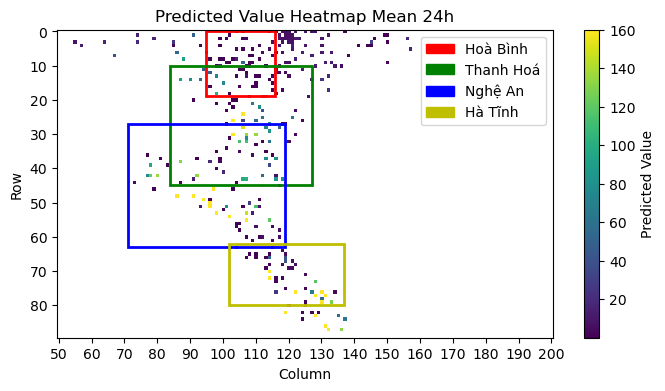

In [72]:
# Initialize an empty image and a count matrix
image_pred = np.zeros((90, 250))
count_pred = np.zeros((90, 250))

# Fill the image with data values and count occurrences
for index, row in data_1h.iterrows():
    r = row['row']
    c = row['col']
    value = row['ensemble_aws_value']
    image_pred[r, c] += value
    count_pred[r, c] += 1

# Calculate the average values
image_pred = np.divide(image_pred, count_pred, where=count_pred != 0)

# Crop the image to only include columns 50 to 200
cropped_image_pred = image_pred[:, 50:201]

# Determine the min and max values for the color bar
vmax = np.max(cropped_image)

# Create a colormap with white for zero values
cmap = plt.cm.viridis
cmap.set_under('white')

# Plot the cropped image
plt.figure(figsize=(8, 4))
plt.imshow(cropped_image_pred, cmap=cmap, aspect='auto', vmin=0.01, vmax=vmax)
plt.colorbar(label='Predicted Value')
plt.xlabel('Column')
plt.ylabel('Row')
plt.title('Predicted Value Heatmap Mean 24h')

# Set x-axis ticks and labels starting from 50
plt.xticks(ticks=np.arange(0, cropped_image.shape[1], 10), labels=np.arange(50, 201, 10))

# Define bounding boxes
boxes = [
    {"xy": (95 - 50, 0), "width": 116 - 95, "height": 19 - 0, "edgecolor": 'r', "label": 'Hoà Bình'},
    {"xy": (84 - 50, 10), "width": 127 - 84, "height": 45 - 10, "edgecolor": 'g', "label": 'Thanh Hoá'},
    {"xy": (71 - 50, 27), "width": 119 - 71, "height": 63 - 27, "edgecolor": 'b', "label": 'Nghệ An'},
    {"xy": (102 - 50, 62), "width": 137 - 102, "height": 80 - 62, "edgecolor": 'y', "label": 'Hà Tĩnh'}
]

# Add bounding boxes to the plot
for box in boxes:
    rect = patches.Rectangle(**box, linewidth=2, facecolor='none')
    plt.gca().add_patch(rect)

# Add legend
handles = [patches.Patch(color=box["edgecolor"], label=box["label"]) for box in boxes]
plt.legend(handles=handles, loc='upper right')

plt.show()

In [73]:
# Define the regions with their respective pixel ranges
regions = {
    'Hoà Bình': {'row_range': (0, 19), 'col_range': (95, 116)},
    'Thanh Hoá': {'row_range': (10, 45), 'col_range': (84, 127)},
    'Nghệ An': {'row_range': (27, 63), 'col_range': (71, 119)},
    'Hà Tĩnh': {'row_range': (62, 80), 'col_range': (102, 137)}
}

# Initialize a dictionary to store the results
region_averages = {}

# Calculate the average values for each region
for region, ranges in regions.items():
    row_min, row_max = ranges['row_range']
    col_min, col_max = ranges['col_range']
    
    # Filter the data for the specified region
    region_data = data_24h[(data_24h['row'] >= row_min) & (data_24h['row'] <= row_max) &
                       (data_24h['col'] >= col_min) & (data_24h['col'] <= col_max)]
    
    # Calculate the mean values
    aws_value_mean = region_data['aws_value'].mean()
    ensemble_aws_value_mean = region_data['ensemble_aws_value'].mean()
    
    # Store the results
    region_averages[region] = {
        'aws_value_mean': aws_value_mean,
        'ensemble_aws_value_mean': ensemble_aws_value_mean
    }

# Print the results
for region, averages in region_averages.items():
    print(f"{region}:")
    print(f"  Average aws_value: {averages['aws_value_mean']:.4f}")
    print(f"  Average ensemble_aws_value: {averages['ensemble_aws_value_mean']:.4f}")

Hoà Bình:
  Average aws_value: 0.4520
  Average ensemble_aws_value: 0.7555
Thanh Hoá:
  Average aws_value: 0.5424
  Average ensemble_aws_value: 0.9516
Nghệ An:
  Average aws_value: 2.1367
  Average ensemble_aws_value: 2.5611
Hà Tĩnh:
  Average aws_value: 6.7479
  Average ensemble_aws_value: 6.8851


# Trung bình 1h


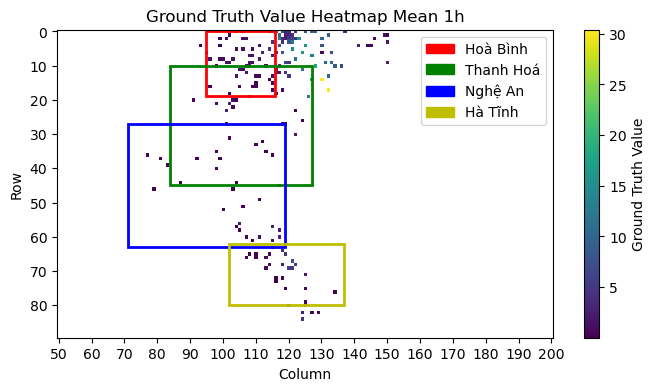

In [78]:
# Initialize an empty image and a count matrix
image = np.zeros((90, 250))
count = np.zeros((90, 250))

# Fill the image with data values and count occurrences
for index, row in data_1h.iterrows():
    r = row['row']
    c = row['col']
    value = row['aws_value']
    image[r, c] += value
    count[r, c] += 1

# Calculate the average values
image = np.divide(image, count, where=count != 0)

# Crop the image to only include columns 50 to 200
cropped_image = image[:, 50:201]

# Create a colormap with white for zero values
cmap = plt.cm.viridis
cmap.set_under('white')

# Plot the cropped image
plt.figure(figsize=(8, 4))
plt.imshow(cropped_image, cmap=cmap, aspect='auto', vmin=0.01)
plt.colorbar(label='Ground Truth Value')
plt.xlabel('Column')
plt.ylabel('Row')
plt.title('Ground Truth Value Heatmap Mean 1h')

# Set x-axis ticks and labels starting from 50
plt.xticks(ticks=np.arange(0, cropped_image.shape[1], 10), labels=np.arange(50, 201, 10))

# Define bounding boxes
boxes = [
    {"xy": (95 - 50, 0), "width": 116 - 95, "height": 19 - 0, "edgecolor": 'r', "label": 'Hoà Bình'},
    {"xy": (84 - 50, 10), "width": 127 - 84, "height": 45 - 10, "edgecolor": 'g', "label": 'Thanh Hoá'},
    {"xy": (71 - 50, 27), "width": 119 - 71, "height": 63 - 27, "edgecolor": 'b', "label": 'Nghệ An'},
    {"xy": (102 - 50, 62), "width": 137 - 102, "height": 80 - 62, "edgecolor": 'y', "label": 'Hà Tĩnh'}
]

# Add bounding boxes to the plot
for box in boxes:
    rect = patches.Rectangle(**box, linewidth=2, facecolor='none')
    plt.gca().add_patch(rect)

# Add legend
handles = [patches.Patch(color=box["edgecolor"], label=box["label"]) for box in boxes]
plt.legend(handles=handles, loc='upper right')

plt.show()


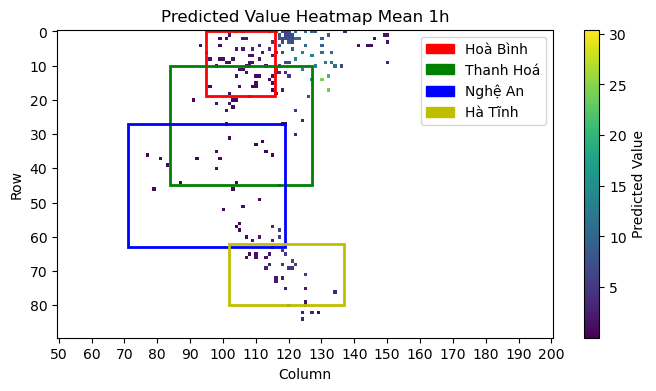

In [75]:
# Initialize an empty image and a count matrix
image_pred = np.zeros((90, 250))
count_pred = np.zeros((90, 250))

# Fill the image with data values and count occurrences
for index, row in data_1h.iterrows():
    r = row['row']
    c = row['col']
    value = row['ensemble_aws_value']
    image_pred[r, c] += value
    count_pred[r, c] += 1

# Calculate the average values
image_pred = np.divide(image_pred, count_pred, where=count_pred != 0)

# Crop the image to only include columns 50 to 200
cropped_image_pred = image_pred[:, 50:201]

# Determine the min and max values for the color bar
vmax = np.max(cropped_image)

# Create a colormap with white for zero values
cmap = plt.cm.viridis
cmap.set_under('white')

# Plot the cropped image
plt.figure(figsize=(8, 4))
plt.imshow(cropped_image_pred, cmap=cmap, aspect='auto', vmin=0.01, vmax=vmax)
plt.colorbar(label='Predicted Value')
plt.xlabel('Column')
plt.ylabel('Row')
plt.title('Predicted Value Heatmap Mean 1h')

# Set x-axis ticks and labels starting from 50
plt.xticks(ticks=np.arange(0, cropped_image.shape[1], 10), labels=np.arange(50, 201, 10))

# Define bounding boxes
boxes = [
    {"xy": (95 - 50, 0), "width": 116 - 95, "height": 19 - 0, "edgecolor": 'r', "label": 'Hoà Bình'},
    {"xy": (84 - 50, 10), "width": 127 - 84, "height": 45 - 10, "edgecolor": 'g', "label": 'Thanh Hoá'},
    {"xy": (71 - 50, 27), "width": 119 - 71, "height": 63 - 27, "edgecolor": 'b', "label": 'Nghệ An'},
    {"xy": (102 - 50, 62), "width": 137 - 102, "height": 80 - 62, "edgecolor": 'y', "label": 'Hà Tĩnh'}
]

# Add bounding boxes to the plot
for box in boxes:
    rect = patches.Rectangle(**box, linewidth=2, facecolor='none')
    plt.gca().add_patch(rect)

# Add legend
handles = [patches.Patch(color=box["edgecolor"], label=box["label"]) for box in boxes]
plt.legend(handles=handles, loc='upper right')

plt.show()

In [76]:
# Define the regions with their respective pixel ranges
regions = {
    'Hoà Bình': {'row_range': (0, 19), 'col_range': (95, 116)},
    'Thanh Hoá': {'row_range': (10, 45), 'col_range': (84, 127)},
    'Nghệ An': {'row_range': (27, 63), 'col_range': (71, 119)},
    'Hà Tĩnh': {'row_range': (62, 80), 'col_range': (102, 137)}
}

# Initialize a dictionary to store the results
region_averages = {}

# Calculate the average values for each region
for region, ranges in regions.items():
    row_min, row_max = ranges['row_range']
    col_min, col_max = ranges['col_range']
    
    # Filter the data for the specified region
    region_data = data_1h[(data_1h['row'] >= row_min) & (data_1h['row'] <= row_max) &
                       (data_1h['col'] >= col_min) & (data_1h['col'] <= col_max)]
    
    # Calculate the mean values
    aws_value_mean = region_data['aws_value'].mean()
    ensemble_aws_value_mean = region_data['ensemble_aws_value'].mean()
    
    # Store the results
    region_averages[region] = {
        'aws_value_mean': aws_value_mean,
        'ensemble_aws_value_mean': ensemble_aws_value_mean
    }

# Print the results
for region, averages in region_averages.items():
    print(f"{region}:")
    print(f"  Average aws_value: {averages['aws_value_mean']:.4f}")
    print(f"  Average ensemble_aws_value: {averages['ensemble_aws_value_mean']:.4f}")

Hoà Bình:
  Average aws_value: 1.4618
  Average ensemble_aws_value: 1.9225
Thanh Hoá:
  Average aws_value: 1.7351
  Average ensemble_aws_value: 2.1169
Nghệ An:
  Average aws_value: 0.8402
  Average ensemble_aws_value: 1.3635
Hà Tĩnh:
  Average aws_value: 1.9154
  Average ensemble_aws_value: 2.9619
